In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import relevent packages
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

In [3]:
#read the csv file and print first few rows
df=pd.read_csv(r'C:\Users\dell\Desktop\New folder\CHICAGO P\Chicago_Crimes_2012_to_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
#convert dates to pandas datetime format
#set the index and add time hour for easy grouping later 
df.Date=pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

df['time_hour']=df['Date'].apply(lambda x:x.hour)
df['month']=df['Date'].apply(lambda x:x.month)
df['year']=df['Date'].apply(lambda x:x.year)

df=df[df['year']!=2017]

#check dataframe
df.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


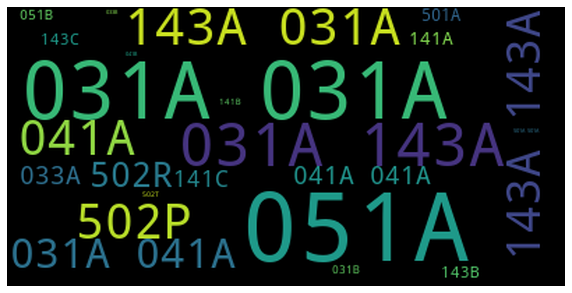

In [5]:
#Analyzing most frequent crime codes
crime_types_code= " ".join(crime for crime in df['IUCR'])

crime_code_worldcloud = WordCloud().generate(crime_types_code)

plt.figure(figsize=[10,10])
plt.imshow(crime_code_worldcloud, interpolation="blackman")
plt.axis("off")
plt.show()

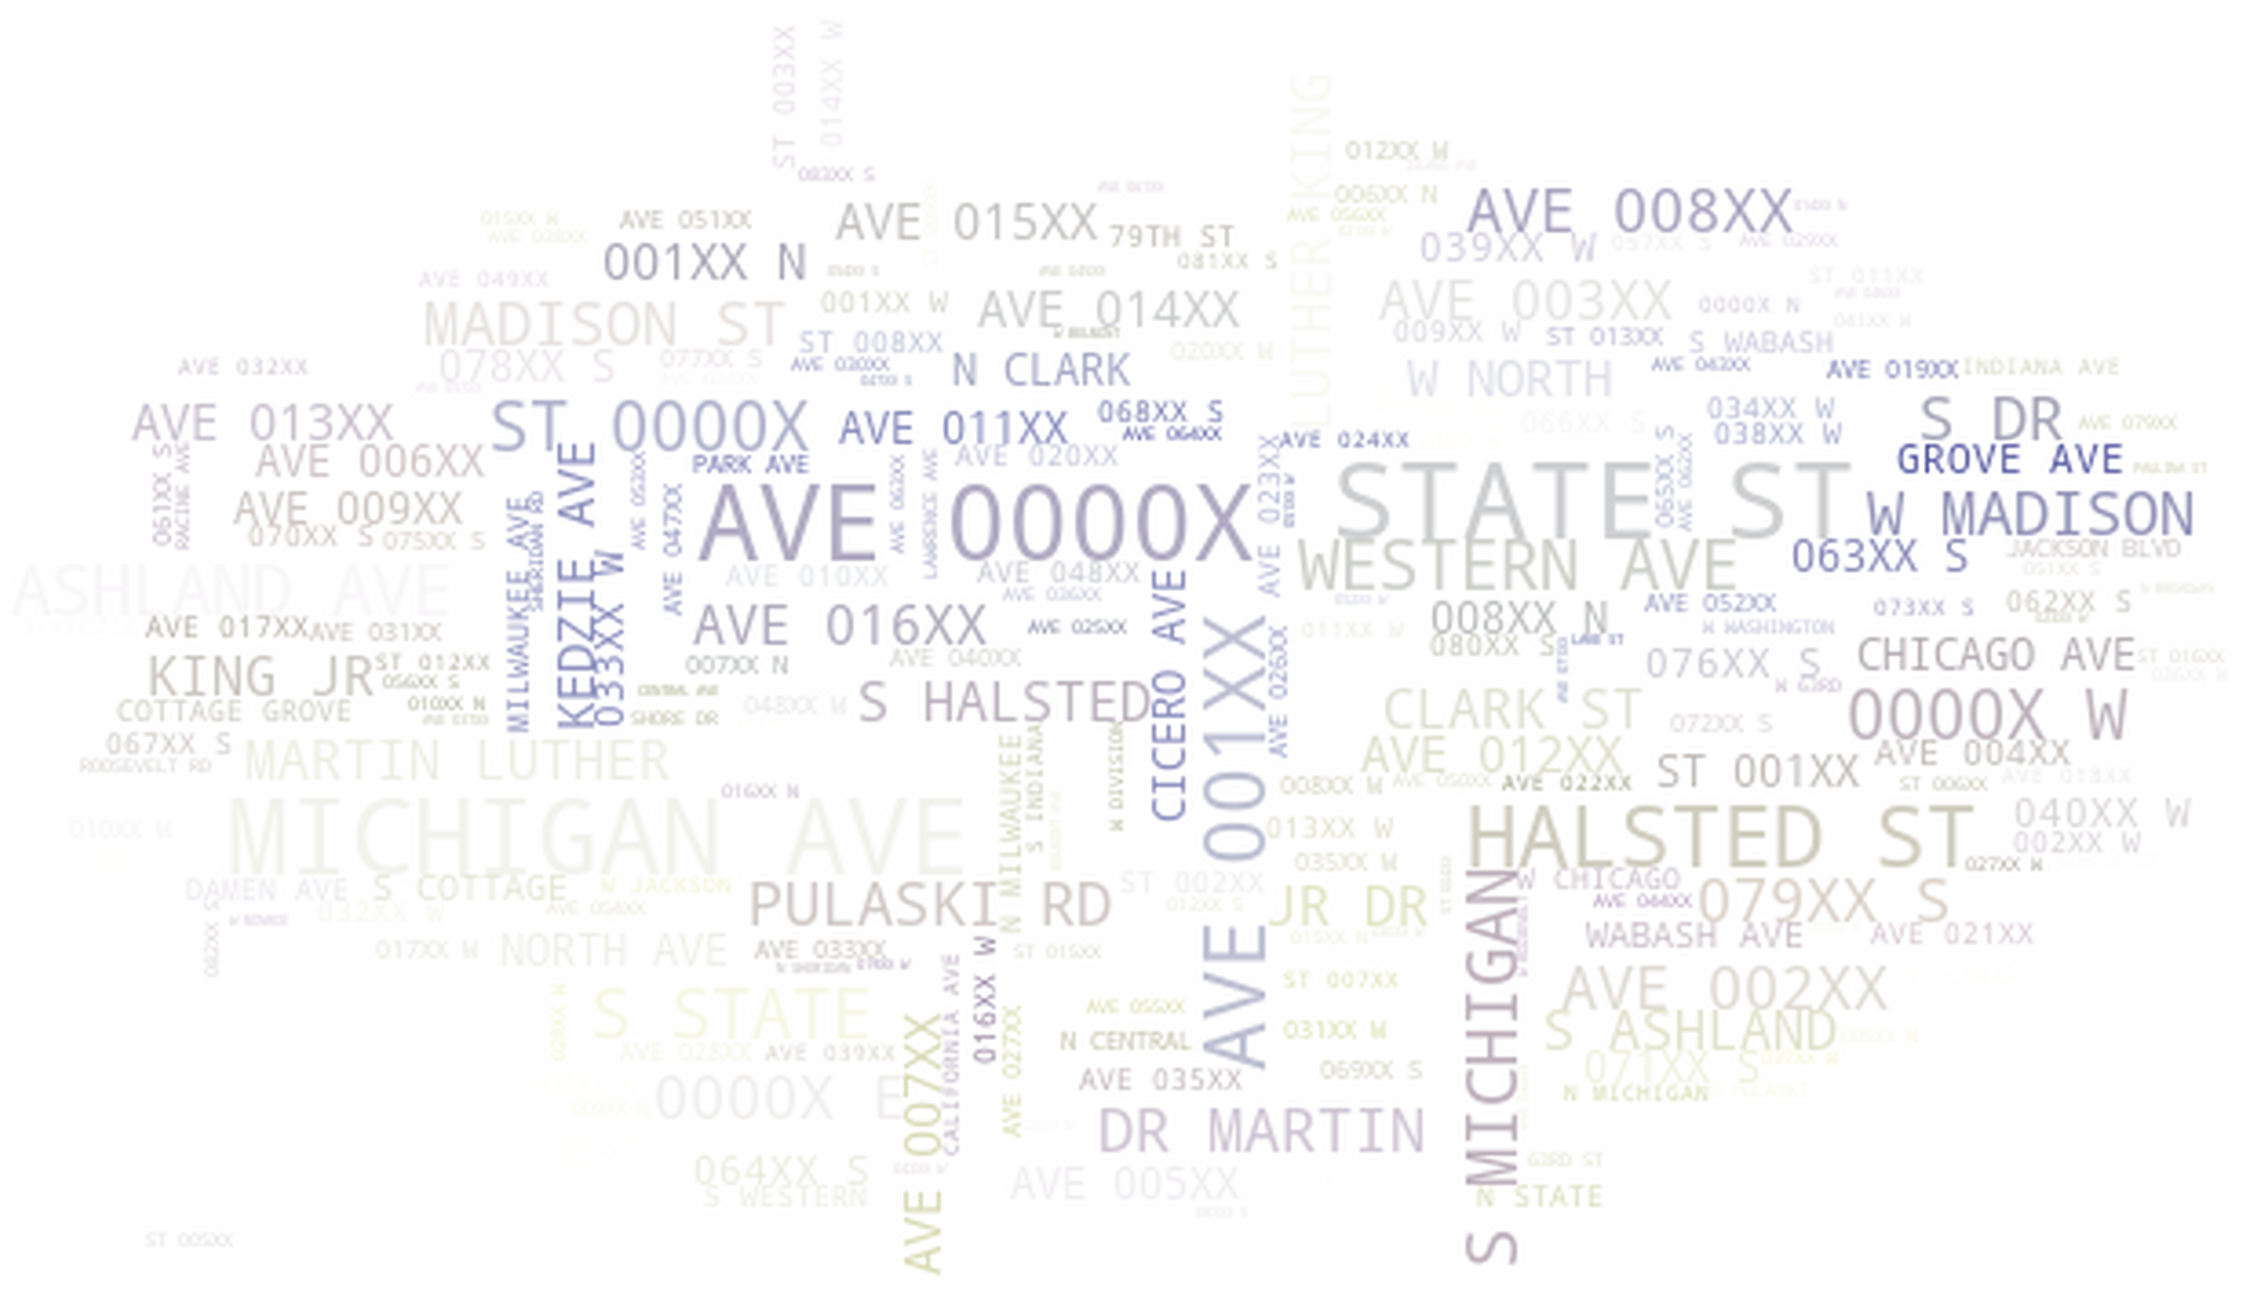

In [6]:
#drop NaN value in "block" column
df_worldcloud=df.copy()
df_worldcloud.dropna(axis=0,subset =['Block'],inplace=True)

crime_types_location=" ".join(crime for crime in df_worldcloud['Block'])
mask=np.array(Image.open(r"C:\Users\dell\Desktop\New folder\CHICAGO P\index1.jpg"))

#create a wordcloud image
crime_location_wordcloud=WordCloud(background_color="White",mode="RGBA",max_words=500,mask=mask).generate(crime_types_location)

#creating coloring from image and plotting
image_colors=ImageColorGenerator(mask)
plt.figure(figsize=[40,30])
plt.imshow(crime_location_wordcloud.recolor(color_func=image_colors),interpolation="Blackman")
plt.axis("off")

#save the image
plt.savefig("wc.jpeg" ,format="jpeg")

plt.show()

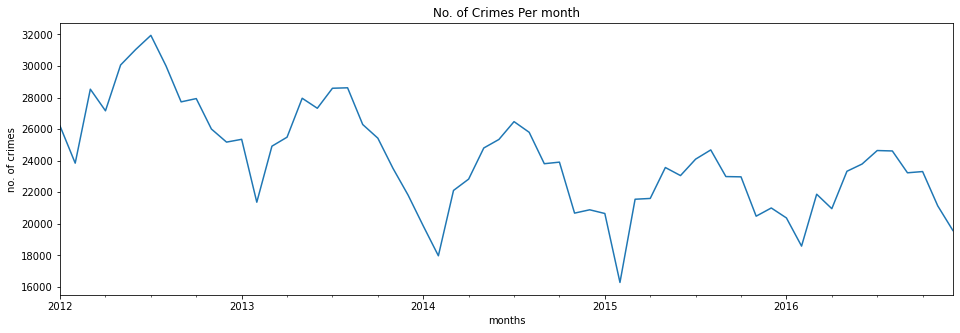

In [7]:
plt.figure(figsize=[16,5])

#time series by month
df.resample('M').size().plot(legend=False)
plt.title("No. of Crimes Per month")
plt.xlabel('months')
plt.ylabel('no. of crimes')
plt.show()

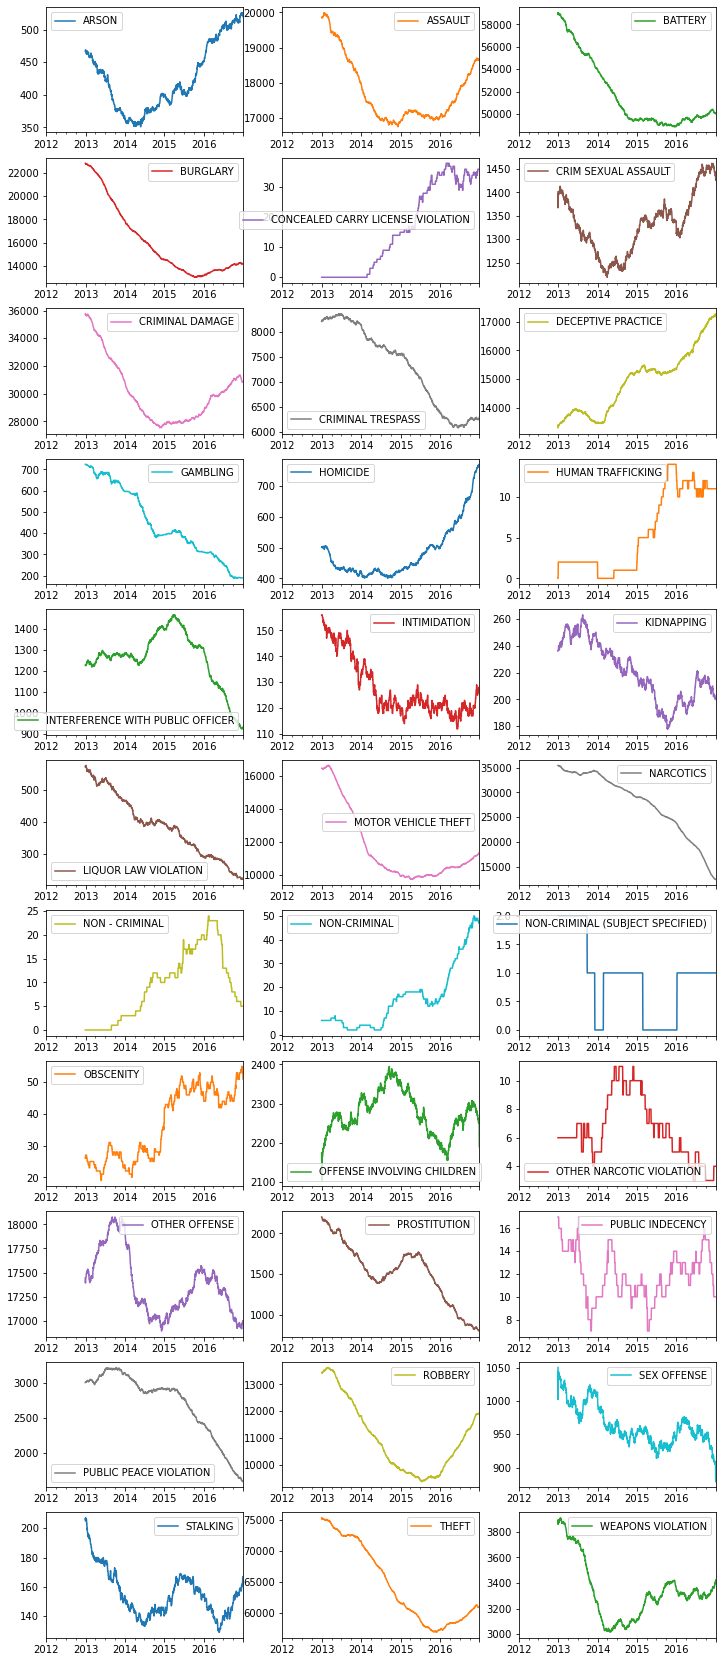

In [8]:

crimes_count_date=df.pivot_table('ID', 
                   aggfunc=np.size,columns='Primary Type',
                   index=df.index.date,fill_value=0)

crimes_count_date.index=pd.DatetimeIndex
                        (crimes_count_date.index)
    
plot=crimes_count_date.rolling(365).sum().plot(figsize=(12,30),
        subplots=True,layout=(-1,3),sharex=False,sharey=False)



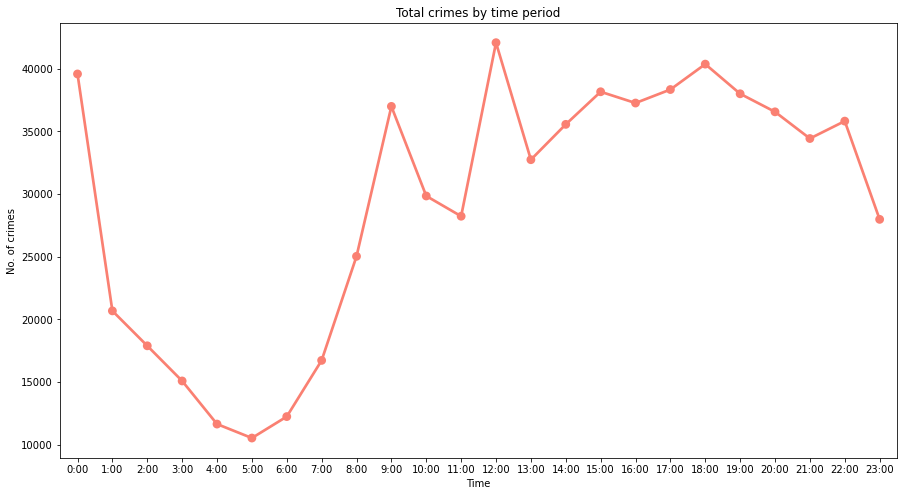

In [9]:
#Overall crime trend by hourly periods 
crimes_by_time=df.copy()

#take important top 10 crimes(columns)
primary_types=['ARSON','CONCEALED CARRY LICENSE VIOLATION','CRIM SEXUAL ASSAULT','DECEPTIVE PRACTICE','HOMICIDE','ROBBERY','THEFT','WEAPONS VIOLATION','MOTOR VEHICLE THEFT','CRIMINAL DAMAGE']

# filter rows with only the top 10 crimies mention 
crimes_by_time=crimes_by_time[crimes_by_time['Primary Type'].isin(primary_types)]

#group crimes by time hour
crimes_by_time=crimes_by_time.groupby('time_hour').size().reset_index(name='No. of crimes')
crimes_by_time['hours']=crimes_by_time['time_hour'].apply(lambda x:str(x)+':00')

#plot crimes by time period
fig=plt.figure(figsize=(15,8))
sns.pointplot(data=crimes_by_time,x="hours",y="No. of crimes",color="salmon")

plt.xlabel('Time')
plt.ylabel('No. of crimes')
plt.title('Total crimes by time period')
plt.show()

<AxesSubplot:title={'center':'No. of crimes by Type'}, xlabel='time_hour'>

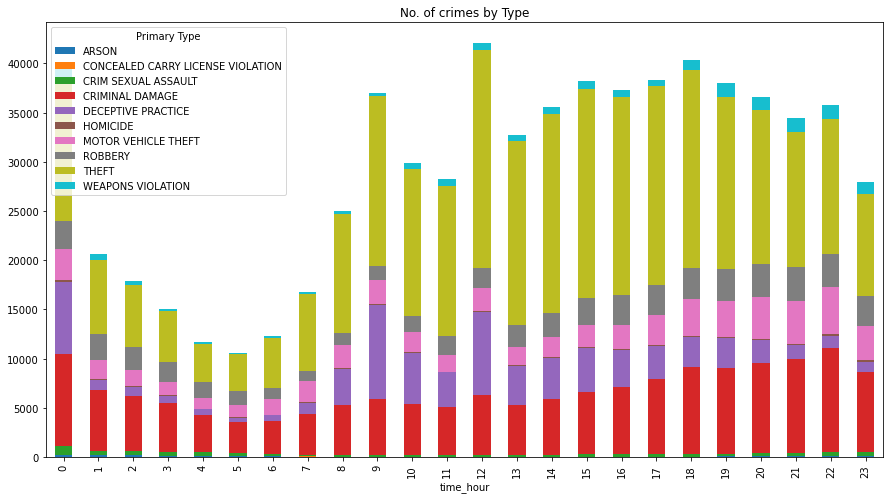

In [10]:
# group crimes by type 
crimes_by_type = df.copy()
crimes_by_type=crimes_by_type[crimes_by_type['Primary Type'].isin(primary_types)]
crimes_by_type=crimes_by_type.groupby(['time_hour','Primary Type']).size().reset_index(name='No. of crimes')

#make it in the format of hour data
crimes_by_time['hours']=crimes_by_type['time_hour'].apply(lambda x:str(x)+':00')

#pivot crime type pivot table
crimes_by_type_pivot=pd.pivot_table(crimes_by_type,index=['time_hour'],columns=['Primary Type'],values='No. of crimes',aggfunc=np.sum)

#stacked Barchart of crime types, compared hourly
crimes_by_type_pivot.plot(kind='bar',stacked=True, figsize=(15,8),title="No. of crimes by Type")

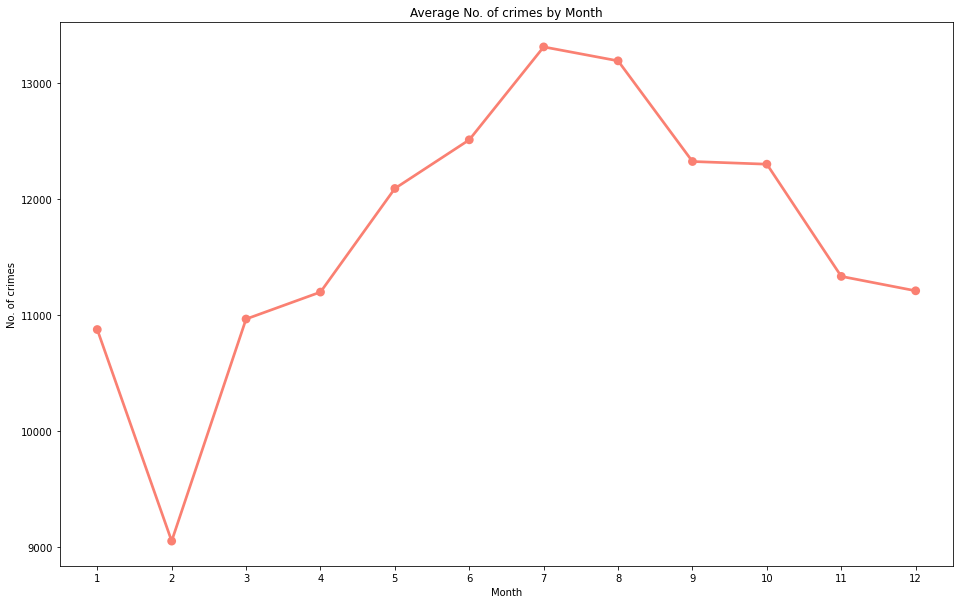

In [13]:
# same monthly plots for crimes 
crimes_by_month = df.copy()
crimes_by_month=crimes_by_month[crimes_by_month['Primary Type'].isin(primary_types)]
crimes_by_month=crimes_by_month.groupby('month').size().reset_index(name='No. of crimes')

crimes_by_month['month(average)'] = crimes_by_month['No. of crimes'].apply(lambda x:x/5)

#plot crimes by month
fig=plt.figure(figsize=(16,10))
sns.pointplot(data= crimes_by_month, x='month',y='month(average)',color="salmon")

#set labels and the title
plt.xlabel('Month')
plt.ylabel('No. of crimes')
plt.title('Average No. of crimes by Month')
plt.show()


<AxesSubplot:title={'center':'No. of crimes by type'}, ylabel='Primary Type'>

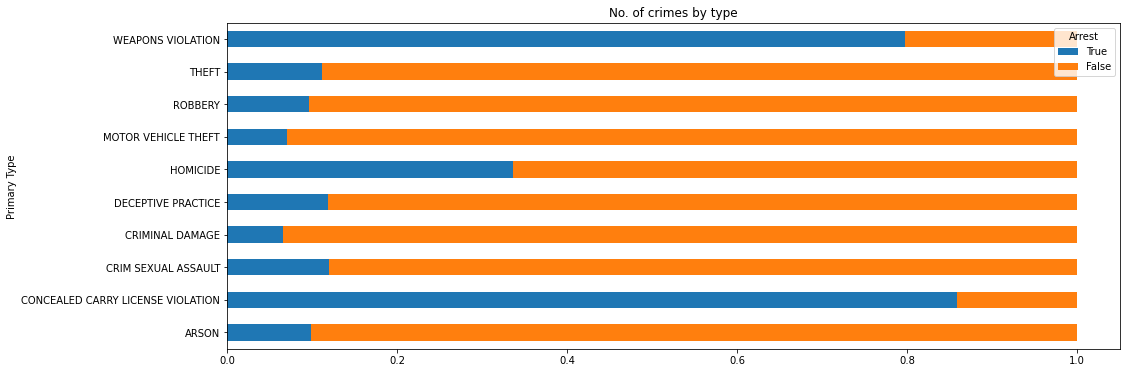

In [14]:
#ratio of crime arrest based on crime types

crimes_by_arrest=df.copy()
crimes_by_arrest=crimes_by_arrest.groupby(['Primary Type','Arrest']).size().reset_index(name='No. of crimes')

# filter top 10 crime primary types 
crimes_by_arrest=crimes_by_arrest[crimes_by_arrest['Primary Type'].isin(primary_types)]

#create pivot table
crimes_by_arrest_pivot=pd.pivot_table(crimes_by_arrest,index=['Primary Type'],columns=['Arrest'],values='No. of crimes',aggfunc=np.sum)
crimes_by_arrest_pivot=crimes_by_arrest_pivot.reset_index()

#creating new coloumn in pivot table
crimes_by_arrest_pivot['Total No.']= crimes_by_arrest_pivot[True]+crimes_by_arrest_pivot[False]
crimes_by_arrest_pivot['True']=crimes_by_arrest_pivot[True]/crimes_by_arrest_pivot['Total No.']
crimes_by_arrest_pivot['False']=crimes_by_arrest_pivot[False]/crimes_by_arrest_pivot['Total No.']
crimes_by_arrest_pivot=crimes_by_arrest_pivot[['Primary Type','True','False']]
crimes_by_arrest_pivot=crimes_by_arrest_pivot.set_index('Primary Type')

#plot stacked barchart
crimes_by_arrest_pivot.plot(kind='barh',stacked=True,figsize=(16,6),title='No. of crimes by type')

In [15]:
# Major crime monthly analysis

#1.- Concatenate 'primary type' & 'Description' together to make a new column
df['Details']= df['Primary Type']+ ',' + df['Description']

# group by crime details and check top 10 rows
top_crimes=df.groupby(['Details'])['Arrest'].count()
top_crimes=pd.DataFrame(top_crimes).nlargest(10,'Arrest').reset_index()
top_crimes=list(top_crimes['Details'])
print(top_crimes)

['THEFT,$500 AND UNDER', 'BATTERY,DOMESTIC BATTERY SIMPLE', 'BATTERY,SIMPLE', 'THEFT,OVER $500', 'CRIMINAL DAMAGE,TO VEHICLE', 'CRIMINAL DAMAGE,TO PROPERTY', 'ASSAULT,SIMPLE', 'NARCOTICS,POSS: CANNABIS 30GMS OR LESS', 'BURGLARY,FORCIBLE ENTRY', 'MOTOR VEHICLE THEFT,AUTOMOBILE']


<AxesSubplot:title={'center':'Major crimes (January - December)'}, xlabel='month', ylabel='Details'>

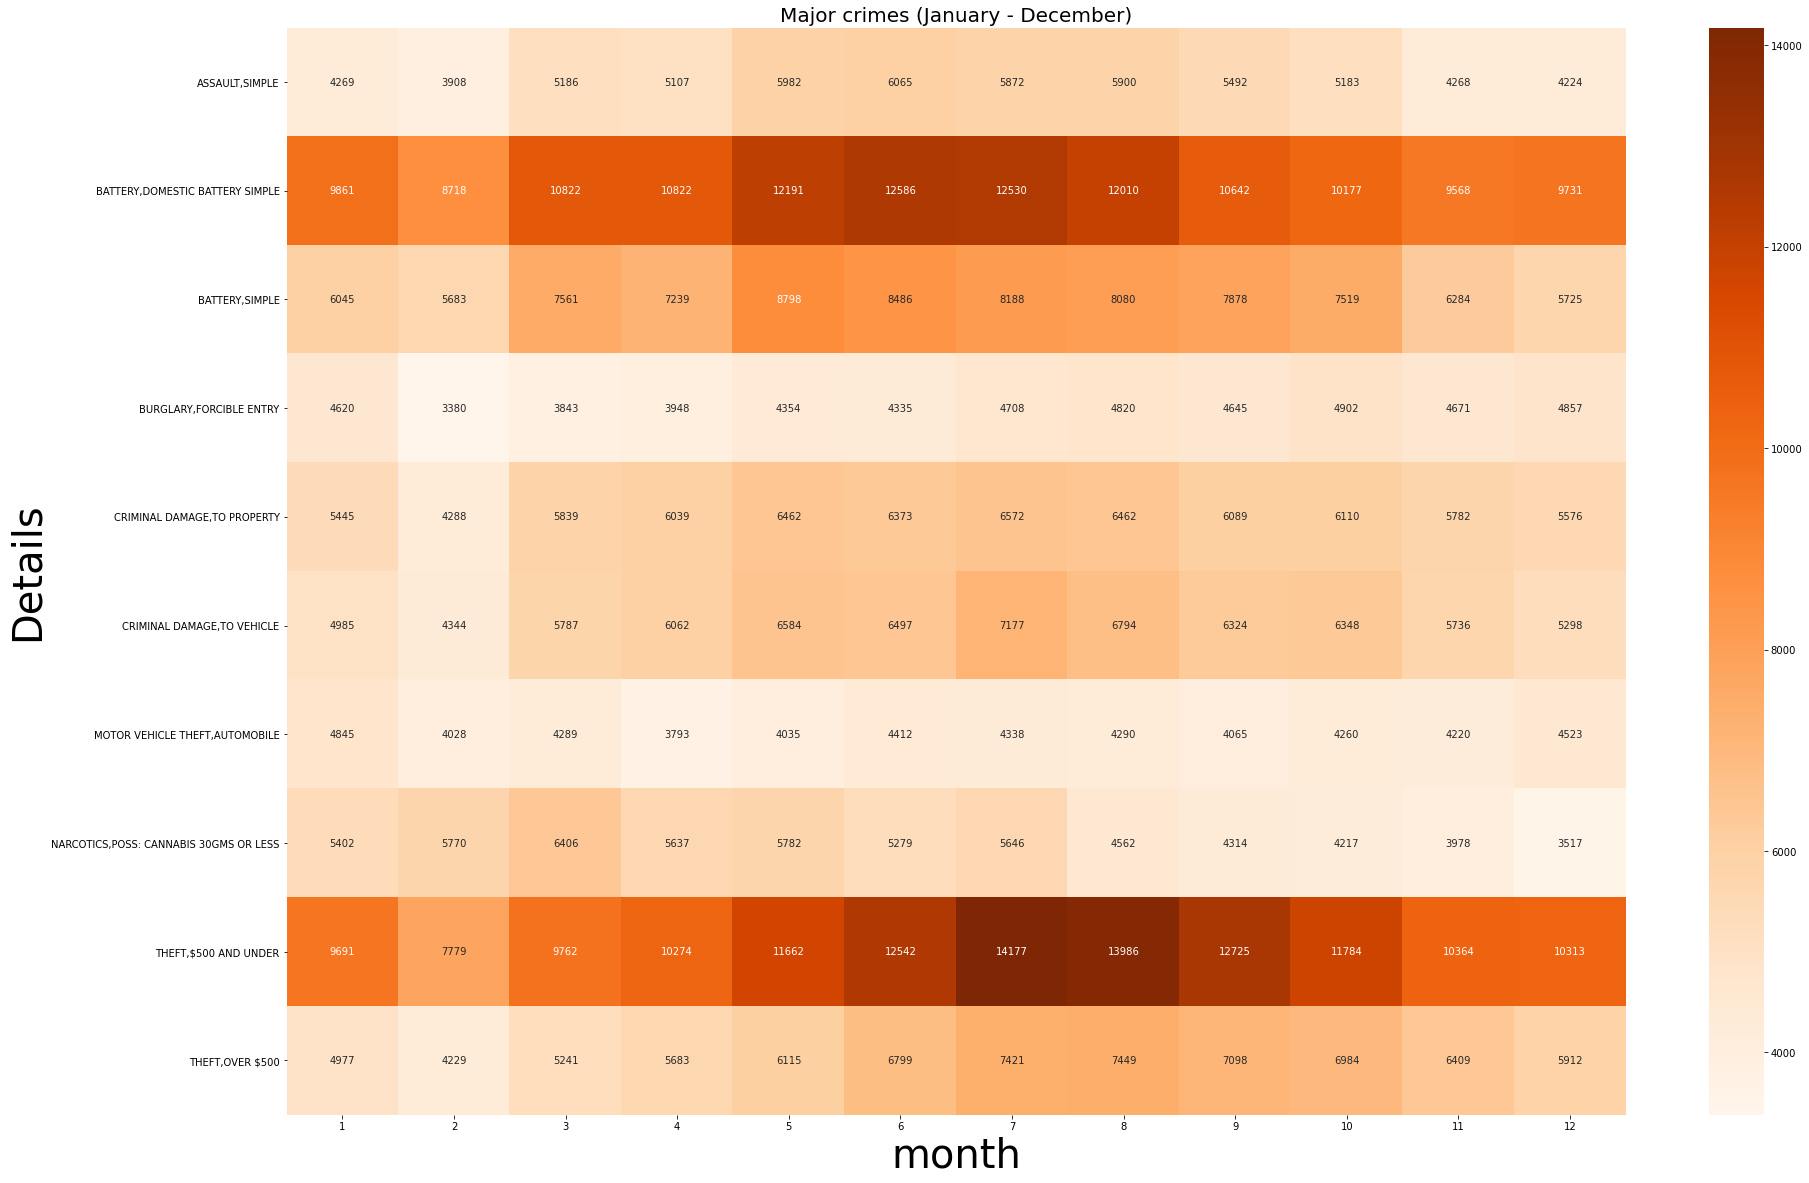

In [32]:
#plotting a heatmap based on top crime description and month

df2=df.groupby(['Details','month'])['Arrest'].count()

#chart formatting

DIMS=(30,20)
fig= plt.figure(figsize=DIMS)
ax1=fig.add_subplot(111)
ax1.set_title('Major crimes (January - December)',fontsize=20)
ax1.set_ylabel('Details',fontsize=40)
ax1.set_xlabel('month',fontsize=40)

#top 20 data
df2=pd.DataFrame(df2).reset_index()
df2=df2[df2['Details'].isin(top_crimes)]

#pivot data to 2D table and fill all na values
df2=df2.pivot_table(index='Details',columns='month',values='Arrest')
df2.fillna(0,inplace=True)

#create heatmap
sns.heatmap(df2,cmap= 'Oranges',annot=True,fmt='g')